In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from scipy.stats import norm

In [58]:
data = np.genfromtxt('../../notebooks/cancer_1_R2 train 0.844 test 0.668.csv', delimiter=',')
preds = data[1,:].T
sigmas = data[2,:].T
trues = data[0,:].T

In [43]:
# Fake data - expected format!
#n_cal = 1000
#n_test = 500
#pred_cal = 5*np.random.rand(n_cal,1)
#sigma_cal = np.random.rand(n_cal,1)
#pred_test = np.random.rand(n_test,1)
#sigma_test = np.random.rand(n_test,1)
#
#true_cal = np.random.rand(n_cal,1)
#true_test = np.random.rand(n_test,1)

In [55]:
n_cal, n_classes = pred_cal.shape 
n_test = true_test.shape[0]
print(f'{n_cal} calibration points')
print(f'{n_test} test points')
print(f'{n_classes} classes')

150 calibration points
95 test points
1 classes


In [56]:
norm_q = norm()

In [ ]:
var_cal = 
var_test = 

In [53]:
# scores
sigma_cal =
sigma_test = 
cal_scores = np.abs(pred_cal-true_cal)/sigma_cal
test_scores = np.abs(pred_test-true_test)/sigma_test

Coverage:1.0
Avg width: 479.0889283080371


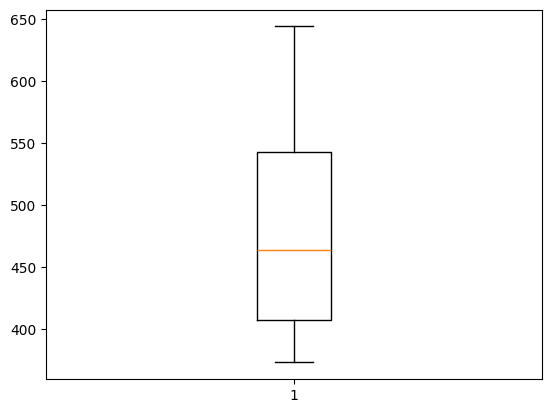

In [54]:
alpha = 0.1
q_level = np.ceil((n_cal+1)*(1-alpha))/n_cal
qhat = np.quantile(cal_scores, q_level, method = 'higher') # check quantile method

# test predictions
test_intervals = np.zeros((n_test,2))
test_intervals[:,0:1] = pred_test-qhat*sigma_test
test_intervals[:,1:] = pred_test+qhat*sigma_test

coverage = ((true_test<=test_intervals[:,1:]) & (true_test>=test_intervals[:,0:1])).sum()/n_test

print(f'Coverage:{coverage}')
widths = test_intervals[:,1]-test_intervals[:,0]
avg_width = widths.mean()

plt.boxplot(widths)
print(f'Avg width: {avg_width}')